In [74]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import seaborn as sns

In [75]:
df = pd.read_csv('/home/tt/Desktop/Downloads/dataset/data.csv')# go_to_college dataset
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [76]:
# columns in our dataset
df.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'in_college'],
      dtype='object')

In [77]:
#shape of our dataset
df.shape

(1000, 11)

In [78]:
# missing values
df.isnull().sum()
# our data does't contain null values

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64

In [79]:
df['school_accreditation'].value_counts()

B    519
A    481
Name: school_accreditation, dtype: int64

In [80]:
# statistics 
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
parent_age,1000.000000,52.208000,3.500427,40.000000,50.000000,52.000000,54.000000,65.000000
parent_salary,1000.000000,5381570.000000,1397545.909682,1000000.000000,4360000.000000,5440000.000000,6382500.000000,10000000.000000
house_area,1000.000000,74.515300,15.293346,20.000000,64.600000,75.500000,84.825000,120.000000
average_grades,1000.000000,86.097200,3.378738,75.000000,83.737500,85.575000,88.262500,98.000000


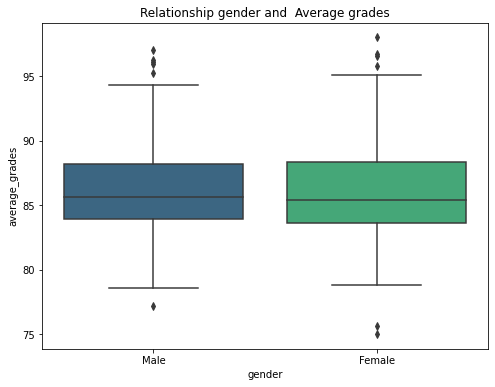

In [81]:
# Data visualisation Explatory analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['gender'], y=df['average_grades'], palette='viridis').set(title='Relationship gender and  Average grades')
plt.show()
# 

Both genders display same level of performance .Females display a negatively skewed disribution.
Both genders have significant number of outliers on the upper whiskers compared to the lower ones.

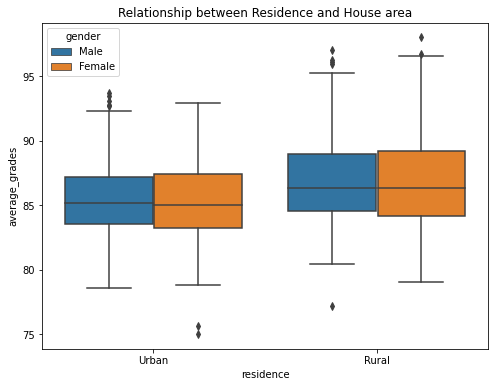

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['residence'], y=df['average_grades'], hue=df['gender']).set(title='Relationship between Residence and House area')
plt.show()


Those students from rural  areas have a high average grades compared to those from urban areas.boxplots from rural areas exhibit a positive skewed distribution while  those from urban areas display a normal distribution.There is high variability of average grades in rural areas compared urban areas.


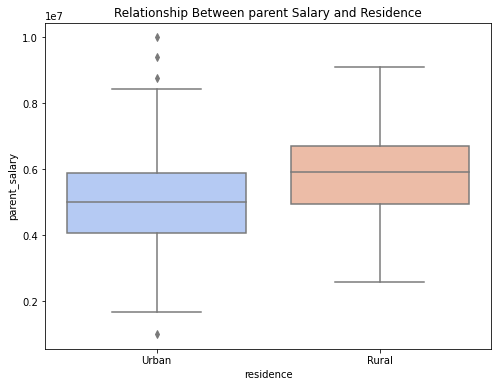

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='residence', y='parent_salary', data=df, palette='coolwarm')
plt.title('Relationship Between parent Salary and Residence')
plt.show()

Parents in urban areas display a high salary compared to those are in rural areas.Boxplots in both areas shows a normal distributed data.

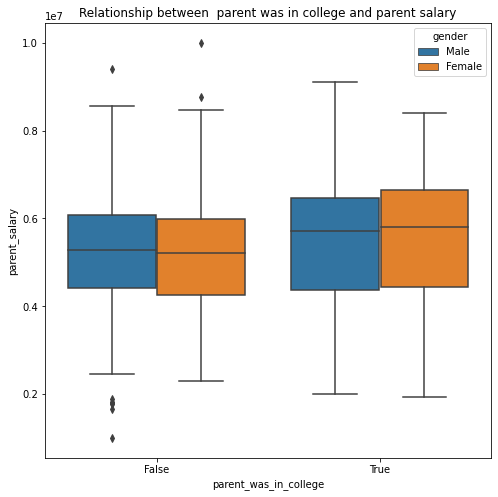

In [84]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=df['parent_was_in_college'], y=df['parent_salary'], hue=df['gender'])
plt.title('Relationship between  parent was in college and parent salary')
plt.show()

parents that went to college earned a higher salary compared to those who didn't. parents who didn"t attend college have a normal ditribution. 
Female parents who attended school have a negatively skewed disteribution. Both distribution having long whiskers shows that parent salary and parent
was in college data have a high degree of dispersion.


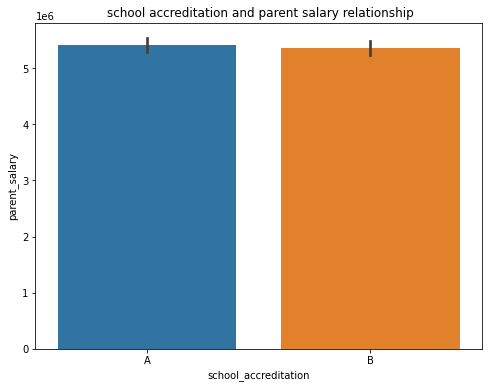

In [85]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['school_accreditation'], y=df['parent_salary']).set(title=' school accreditation and parent salary relationship')
plt.show()

The Bars are almost the same showing parents salary does not influence whether their kids will study in school A or B.

school B  

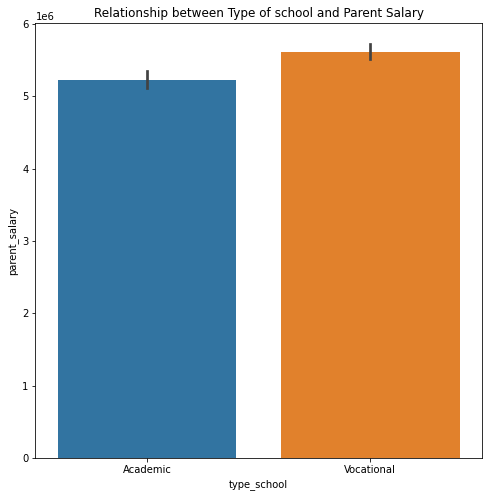

In [86]:
plt.figure(figsize=(8, 8))
sns.barplot(x=df['type_school'], y=df['parent_salary']).set(title='Relationship between Type of school and Parent Salary')
plt.show()

The above barplot shows that parents with a high salary slightl placed their kids in academic schools compared to vocational ones

In [87]:
# variabes in interest column and their counts
df.interest.value_counts()

Very Interested     324
Uncertain           261
Less Interested     229
Quiet Interested    100
Not Interested       86
Name: interest, dtype: int64

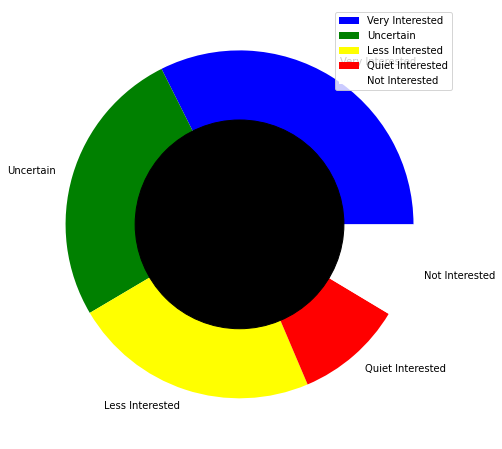

In [88]:
# circle showing various sizes of variables in interest column
plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 0.6, color='black')
plt.pie(df['interest'].value_counts(), labels=['Very Interested', 'Uncertain', 'Less Interested', 'Quiet Interested',
'Not Interested'], colors=['blue', 'green', 'yellow', 'red', 'white'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

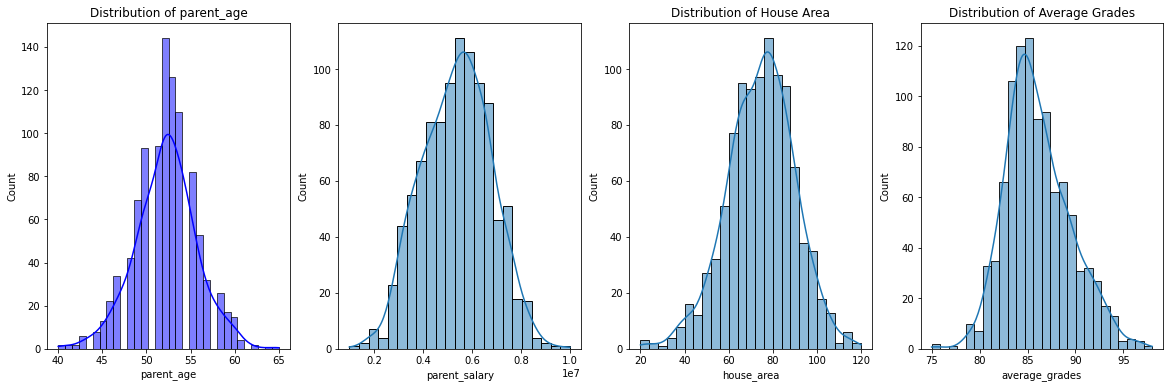

In [89]:
# bivariate analysis
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
sns.histplot(ax=axes[0], x='parent_age', kde=True, data=df, color='blue').set(title='Distribution of parent_age')
sns.histplot(ax=axes[1], x='parent_salary', kde=True, data=df, palette='coolwarm').set9title='Distribution of parent salary'
sns.histplot(ax=axes[2], x='house_area', kde=True, data=df, palette='winter').set(title='Distribution of House Area')
sns.histplot(ax=axes[3], x='average_grades', kde=True, data=df, palette='RdBu').set(title='Distribution of Average Grades')
plt.show()

 Parent age shows a normal distribution which is leptokurtic in nature.
 parent salary  have a normal distribution which is leptokurtic in nature.
house area have a normal distribution.
average grades have a normal distribution which is slightly skewed to the right.


array([[<AxesSubplot:title={'center':'parent_age'}>,
        <AxesSubplot:title={'center':'parent_salary'}>],
       [<AxesSubplot:title={'center':'house_area'}>,
        <AxesSubplot:title={'center':'average_grades'}>]], dtype=object)

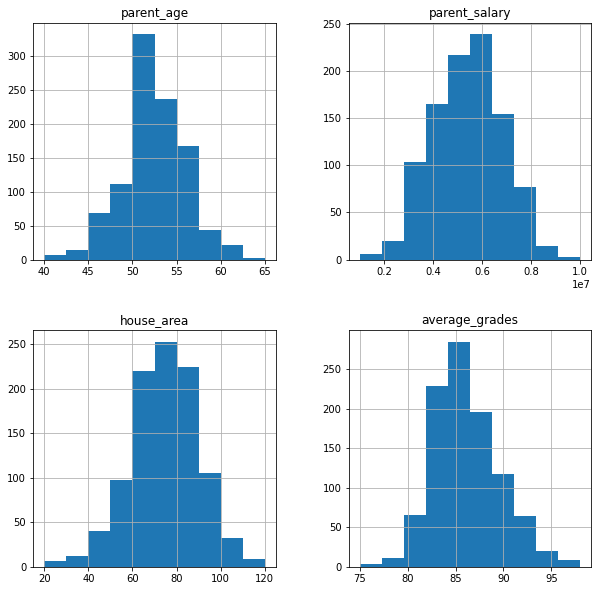

In [90]:
# distribution of variables in our dataset usin pandas hist method
df.hist(bins=10, figsize=(10, 10))

In [91]:
df.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'in_college'],
      dtype='object')

 outlier analysis

<AxesSubplot:xlabel='parent_age'>

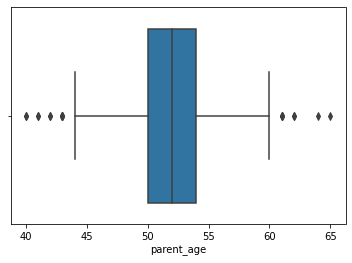

In [92]:
# outlier analysis on parent_age
sns.boxplot(x=df['parent_age'])

<AxesSubplot:xlabel='house_area'>

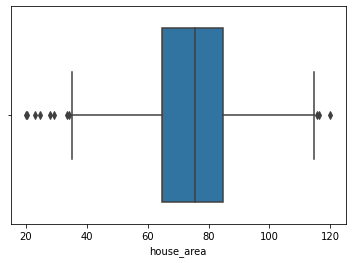

In [93]:
#outlier analysis on house area
#  we will use data visulization to check outliers
sns.boxplot(x=df['house_area'])

<AxesSubplot:xlabel='parent_salary'>

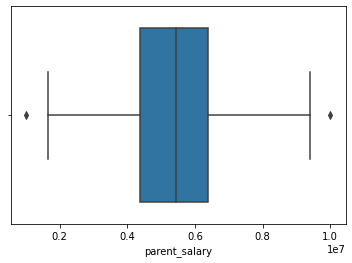

In [94]:
# outlier analysis
sns.boxplot(x=df['parent_salary'])

 The above boxplots shows that outliers are quite few thus no need of removing them to avoid overfitting our model


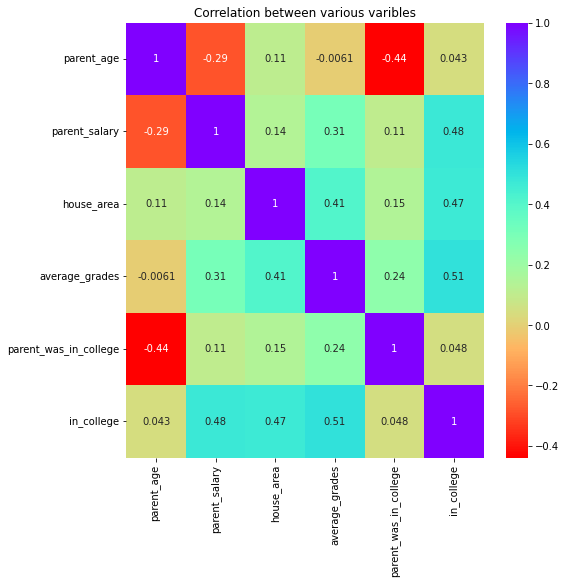

In [95]:
# checking correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='rainbow_r').set(title='Correlation between various varibles')
plt.show()

correlation shows how one variable is linearly related to one another and it ranges from -1 to 1. The variables in_college and average grades have
value of 0.51 thus they are fairly correlated.
Parent age and Parent was in college are two variables that shows the most negative correlation value of -0.44.



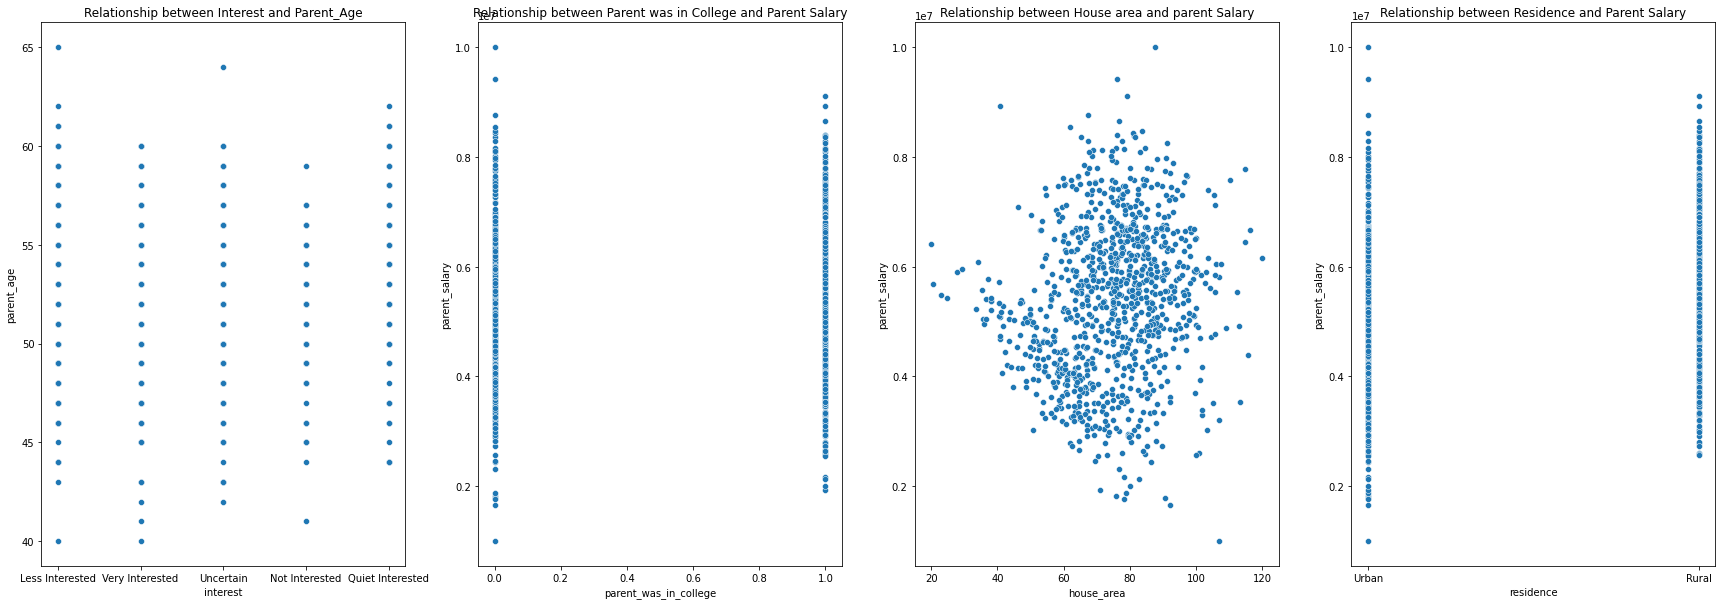

In [96]:
# comparison of various variables in our dataset
fig, axes = plt.subplots(1, 4, figsize=(30, 10))
axes.flatten()
sns.scatterplot(ax=axes[0], x='interest', y='parent_age', data=df).set(title='Relationship between Interest and Parent_Age')
sns.scatterplot(ax=axes[1], x='parent_was_in_college', y='parent_salary', data=df).set(title='Relationship between Parent was in College and Parent Salary')
sns.scatterplot(ax=axes[2], x='house_area', y='parent_salary', data=df).set(title='Relationship between House area and parent Salary')
sns.scatterplot(ax=axes[3], x='residence', y='parent_salary', data=df).set(title='Relationship between Residence and Parent Salary')
plt.show()


House area and parent salary doesnt show any noticeable correlation.
Relationship betweeen residence and parent Salary shows that as one increases so do the other.
An increase in parent age leads to an increase in interest.




Text(0.5, 1.0, 'Relationship between parent salary and parent age')

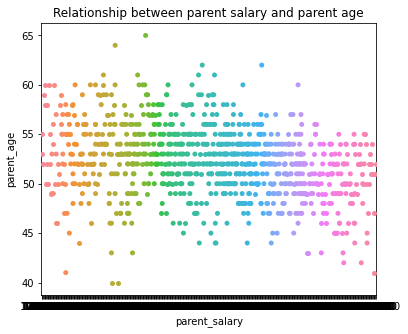

In [97]:
plt.figure(figsize=(6, 5))
sns.stripplot(y='parent_age', x='parent_salary', data=df)
plt.title('Relationship between parent salary and parent age')
# there is no correlation between parent salary and parent age

In [98]:

df.columns


Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'in_college'],
      dtype='object')

In [99]:
# checking data types of columns in our dataset
df.dtypes

type_school               object
school_accreditation      object
gender                    object
interest                  object
residence                 object
parent_age                 int64
parent_salary              int64
house_area               float64
average_grades           float64
parent_was_in_college       bool
in_college                  bool
dtype: object

In [100]:
# index and their counts in our variable
df['parent_was_in_college'].value_counts()

True     520
False    480
Name: parent_was_in_college, dtype: int64

In [101]:
#index and their counts in our variable
df['in_college'].value_counts()

True     500
False    500
Name: in_college, dtype: int64

In [102]:
# categorising our data and changing booleans into integers to be compatible in our model
# introducing dummy variables in the qualitative explanatory variables
df['type_school'] = pd.Categorical(df['type_school']).codes
df['school_accreditation'] = pd.Categorical(df['school_accreditation']).codes
df['gender'] = pd.Categorical(df['gender']).codes
df['interest'] = pd.Categorical(df['interest']).codes
df['residence'] = pd.Categorical(df['residence']).codes
df['parent_was_in_college'] = df['parent_was_in_college'].astype(int)
df['in_college'] = df['in_college'].astype(int)
df.head()


,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,0,0,1,0,1,56,6950000,83.0,84.09,0,1
1,0,0,1,0,1,57,4410000,76.8,86.91,0,1
2,0,1,0,4,1,50,6500000,80.6,87.43,0,1
3,1,1,1,4,0,49,6600000,78.2,82.12,1,1
4,0,0,0,4,1,57,5250000,75.1,86.79,0,0


In [103]:
# unique values in our dataset
df.nunique()

type_school                2
school_accreditation       2
gender                     2
interest                   5
residence                  2
parent_age                25
parent_salary            461
house_area               472
average_grades           684
parent_was_in_college      2
in_college                 2
dtype: int64

In [104]:
# various statistics on average column grades
df['average_grades'] = np.round(df['average_grades'], 1)
print(df['average_grades'].describe())

count    1000.000000
mean       86.096400
std         3.379267
min        75.000000
25%        83.700000
50%        85.600000
75%        88.300000
max        98.000000
Name: average_grades, dtype: float64


In [105]:
# 
x = df.drop('in_college', axis=1)
y = df['in_college']

In [106]:
# training data and preprocesing our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=41)
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
x_train = mx.fit_transform(x_train)
x_test = mx.transform(x_test)

In [107]:
# modelling

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test)
print(acc)
pred = lr.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

0.885
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        93
           1       0.89      0.90      0.89       107

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.89      0.88       200



[[81 12]
 [11 96]]


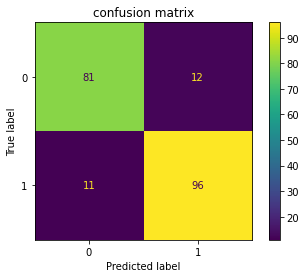

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(pred, y_test, labels= lr.classes_)
print(cm)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
display.plot()
plt.title('confusion matrix')
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
print('mean squared error :',mean_squared_error(pred, y_test))
print('r2_score :', r2_score(pred, y_test))

mean squared error : 0.115
r2_score : 0.5377349010149735
